![Illustration of silhouetted heads](mentalhealth.jpg)

Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


Explore the `students` data using PostgreSQL to find out if you would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find helpful.

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

In [1]:
-- Run this code to view the data in students
SELECT * 
FROM students;

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,,,,,NaN,NaN,NaN,,NaN,,NaN,,,,,,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,140,,,,,,,,,
282,,,,,NaN,NaN,NaN,,NaN,,NaN,,,,,,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,131,,,,,,,,,
283,,,,,NaN,NaN,NaN,,NaN,,NaN,,,,,,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,202,,,,,,,,,
284,,,,,NaN,NaN,NaN,,NaN,,NaN,,,,,,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,207,,,,,,,,,


In [2]:
SELECT stay, COUNT(inter_dom) AS count_int, ROUND(AVG(todep),2) AS average_phq, ROUND(AVG(tosc),2) AS average_scs,
ROUND(AVG(toas),2) AS average_as
FROM students
WHERE inter_dom='Inter'
GROUP BY stay
ORDER BY stay DESC
LIMIT 9;

,stay,count_int,average_phq,average_scs,average_as
0,10,1,13.00,32.00,50.00
1,8,1,10.00,44.00,65.00
2,7,1,4.00,48.00,45.00
3,6,3,6.00,38.00,58.67
4,5,1,0.00,34.00,91.00
5,4,14,8.57,33.93,87.71
6,3,46,9.09,37.13,78.00
7,2,39,8.28,37.08,77.67
8,1,95,7.48,38.11,72.80


In [3]:
SELECT stay, COUNT(inter_dom) AS count_int, ROUND(AVG(todep),2) AS average_phq, ROUND(AVG(tosc),2) AS average_scs,
ROUND(AVG(toas),2) AS average_as
FROM students
WHERE inter_dom='Dom'
GROUP BY stay
ORDER BY stay DESC
LIMIT 9;

,stay,count_int,average_phq,average_scs,average_as
0,5,2,11.50,34.00,88.00
1,4,9,7.00,36.67,64.78
2,3,23,8.43,39.09,58.04
3,2,13,9.46,37.08,66.46
4,1,20,8.70,37.15,62.60


In [4]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# create pandas dataframe

df_international = pd.DataFrame(df)

df_domestic = pd.DataFrame(df1)

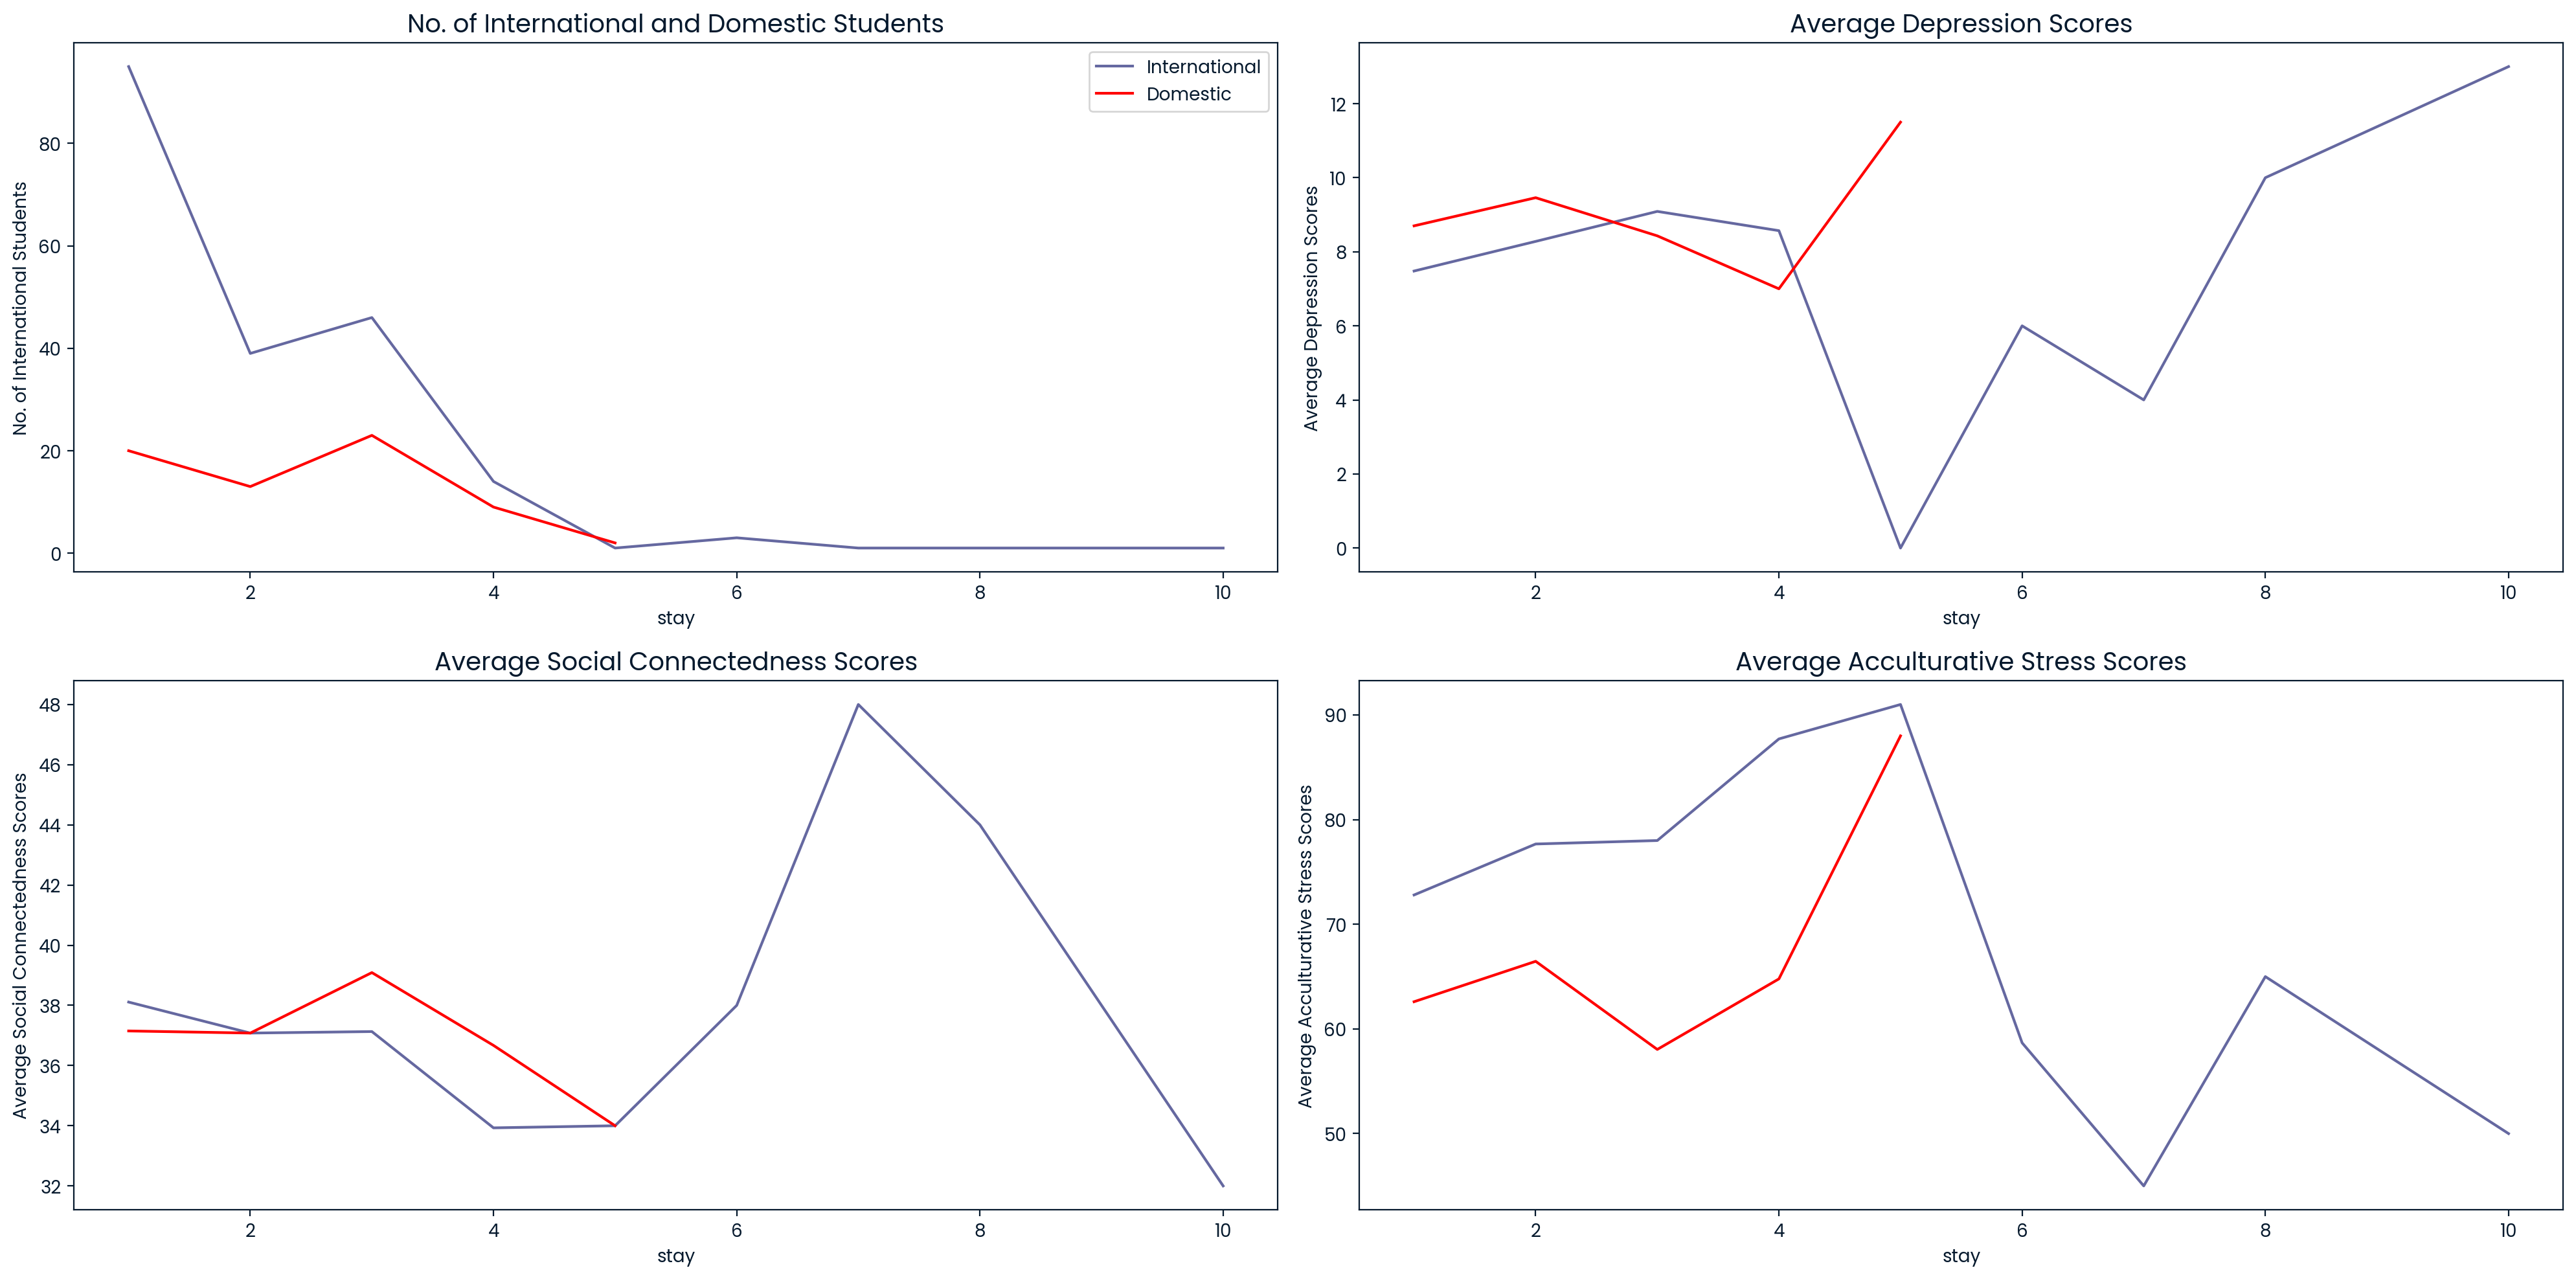

In [7]:
# create graphs to examine the relationships between `stay` and `count_int`, `average_phq`,`average_scs`,`average_as`

fig, axes = plt.subplots(2,2,figsize=(20,10))

sns.lineplot(data=df_international, x='stay', y='count_int', ax=axes[0,0], label='International')
sns.lineplot(data=df_domestic, x='stay', y='count_int', color='red', ax=axes[0,0], label='Domestic')
axes[0, 0].set_title('No. of International and Domestic Students',fontsize=14)
axes[0,0].set_ylabel('No. of International Students')

sns.lineplot(data=df_international, x='stay', y='average_phq', ax=axes[0,1])
sns.lineplot(data=df_domestic, x='stay', y='average_phq', color='red',ax=axes[0,1])
axes[0, 1].set_title('Average Depression Scores',fontsize=14)
axes[0,1].set_ylabel('Average Depression Scores')

sns.lineplot(data=df_international, x='stay', y='average_scs', ax=axes[1,0])
sns.lineplot(data=df_domestic, x='stay', y='average_scs', color='red', ax=axes[1,0])
axes[1, 0].set_title('Average Social Connectedness Scores',fontsize=14)
axes[1,0].set_ylabel('Average Social Connectedness Scores')

sns.lineplot(data=df_international, x='stay', y='average_as', ax=axes[1,1])
sns.lineplot(data=df_domestic, x='stay', y='average_as', color='red', ax=axes[1,1])
axes[1, 1].set_title('Average Acculturative Stress Scores',fontsize=14)
axes[1,1].set_ylabel('Average Acculturative Stress Scores')

fig.tight_layout()
plt.show()

# Conclusion

In general, international students staying longer at Japanese International University tend to have higher average depression scores. Here are some interesting findings from the graphs:

> * Students who stayed for at most 5 years had similar average depression and social connectedness scores between international and domestic students. However, the average acculturative stress scores were higher for international students compared to domestic students. This suggests that more cultural immersion programs such as homestays or pairing international students with Japanese students could help reduce acculturative stress.
> * There is a drop in average depression scores among international students at the 5th year, possibly due to graduating and looking forward to returning to their own countries.
> * Among students who stayed for more than 5 years, there seems to be a relationship between social connectedness and depression. Students in their 6th year had higher average social connectedness scores than those in their 10th year, while the opposite trend was observed for the average depression scores. This suggests that belonging to a social group may benefit international students' mental health and reduce depression. Thus, organizing more social groups for international students may help with their mental health.
> * The average acculturative stress scores decrease as international students stay longer, possibly indicating that they become better accustomed to Japanese culture and tradition after staying for more than 5 years. 

In conclusion, it would be advisable to consider implementing more programs that promote cultural immersion and social connectedness, as these can positively impact international students' mental health.